In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

# Import the data
df = pd.read_csv('dataset_mood_smartphone.csv')
df = df.drop('Unnamed: 0', 1)
df.loc[:,('time')] = pd.to_datetime(df.time)

# Create variables for the unique variables & ids used in the research
score_variables = df.variable.unique()[0:3]
other_variables = df.variable.unique()[3:]
ids = df.id.unique()
dates = pd.date_range(start=df.time.min().round('D'), end=df.time.max().round('D'), freq='D')

## Displaying the data in a more suitable fashion

In [2]:
# First, create a new dataframe dat has multiple indices
df_alt = pd.DataFrame(np.nan,
                    index = pd.MultiIndex.from_product([df.id.unique(),pd.date_range(start=df.time.min().round('D'), end=df.time.max().round('D'), freq='D')], names = ["ID", "time"]),
                    columns= df.variable.unique())

In [3]:
# Thereafter, we will fill the aformentioned DataFrame with the restructured values
count = 0;
print('This may take a while, right now we finished:')
for i in ids:
    id_used = df[df.id == i]
    id_used.index = id_used.time
    
    for j in score_variables:
        sub_df = id_used[id_used.variable == j].value.resample('D').mean()
        used_dates = np.array(sub_df.index.strftime('%Y-%m-%d'))
        for k in used_dates:
            df_alt.loc[i, j].loc[k] = sub_df[k]
            
    for j in other_variables:
        sub_df = id_used[id_used.variable == j].value.resample('D').sum()
        used_dates = np.array(sub_df.index.strftime('%Y-%m-%d'))
        for k in used_dates:
            df_alt.loc[i, j].loc[k] = sub_df[k]
            
    print(i)


This may take a while, right now we finished:
AS14.01
AS14.02
AS14.03
AS14.05
AS14.06
AS14.07
AS14.08
AS14.09
AS14.12
AS14.13
AS14.14
AS14.15
AS14.16
AS14.17
AS14.19
AS14.20
AS14.23
AS14.24
AS14.25
AS14.26
AS14.27
AS14.28
AS14.29
AS14.30
AS14.31
AS14.32
AS14.33


In [4]:
# Rename matrix, for certainty
df_used = df_alt
# Adding t column
df_used['t'] = np.nan
count = 0
for i in ids:
    count_days = 0
    for d in dates:
        count_days +=1
        df_used['t'][count] = count_days
        count += 1

# Descriptive statistics
After completing the pre-processing of the data, we want to get a better picture of what this data describes.
First, let's look at the number of individuals.

In [5]:
print(len(df.id.unique()))

27


Then, let's find out which features are used most frequent.

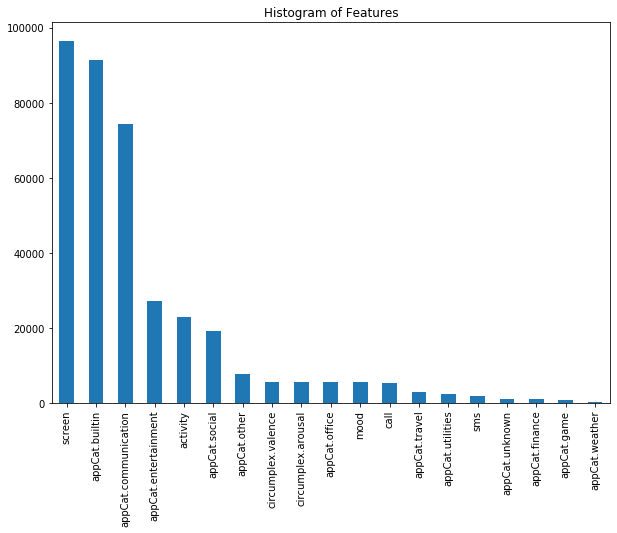

In [6]:
pd.DataFrame(df.variable.value_counts()).plot.bar(title="Histogram of Features", legend=None,figsize=(10,7));

## Cleaning the data
It can be seen in the dataframes that, while for most of the days data is available, large gaps exist for the
score variables. Therefore, we will clean the data, deleting groups of rows that contain "NA"s in more than 2 consecutive days for mood (which translates to NAs in valence and and arousal).

In [7]:
# Thereafter, we will fill the aformentioned DataFrame with the restructured values
print('This may take a while, right now we finished:')
for i in ids:
    count = 0
    deathrow = []
    
    for j in np.array(dates.strftime('%Y-%m-%d')):
        
        if np.isnan(df_used.loc[i,'mood'][j]):
            count += 1
            deathrow.append(j)
            
            if j == np.array(dates.strftime('%Y-%m-%d'))[-1]:
                for d in deathrow:
                    df_used = df_used.drop((i, d))
            
                deathrow = []
                count = 0
                
        else:
            if count > 2:
                for d in deathrow:
                    df_used = df_used.drop((i, d))
        
            deathrow = []
            count = 0
                
    print('Participant: ',i)
        


This may take a while, right now we finished:
Participant:  AS14.01
Participant:  AS14.02
Participant:  AS14.03
Participant:  AS14.05
Participant:  AS14.06
Participant:  AS14.07
Participant:  AS14.08
Participant:  AS14.09
Participant:  AS14.12
Participant:  AS14.13
Participant:  AS14.14
Participant:  AS14.15
Participant:  AS14.16
Participant:  AS14.17
Participant:  AS14.19
Participant:  AS14.20
Participant:  AS14.23
Participant:  AS14.24
Participant:  AS14.25
Participant:  AS14.26
Participant:  AS14.27
Participant:  AS14.28
Participant:  AS14.29
Participant:  AS14.30
Participant:  AS14.31
Participant:  AS14.32
Participant:  AS14.33


In [11]:
df_used

mood  circumplex.arousal  circumplex.valence  \
ID      time                                                           
AS14.01 2014-02-26  6.250000           -0.250000            0.750000   
        2014-02-27  6.333333            0.000000            0.333333   
        2014-03-21  6.200000            0.200000            0.200000   
        2014-03-22  6.400000            0.600000            0.500000   
        2014-03-23  6.800000            0.200000            0.800000   
...                      ...                 ...                 ...   
AS14.33 2014-05-27  6.200000           -0.600000            0.400000   
        2014-05-28  8.200000            0.000000            1.200000   
        2014-05-29  7.000000           -1.333333            1.000000   
        2014-05-30  6.800000           -0.800000           -0.400000   
        2014-05-31  7.000000           -2.000000            1.000000   

                    activity        screen  call  sms  appCat.builtin  \
ID      time                                                            
AS14.01 2014-02-26       NaN           NaN   1.0  2.0             NaN   
        2014-02-27       NaN           NaN   0.0  0.0             NaN   
        2014-03-21  3.083152  17978.907000   6.0  0.0        3139.218   
        2014-03-22  3.790084   6142.161000   3.0  1.0         731.429   
        2014-03-23  2.141117   6773.832001   0.0  0.0        1286.246   
...                      ...           ...   ...  ...             ...   
AS14.33 2014-05-27  0.304902   4089.879001   1.0  2.0         726.391   
        2014-05-28  2.479228  14320.867998  10.0  1.0        2551.046   
        2014-05-29  4.064507   3569.341000   5.0  1.0         400.034   
        2014-05-30  4.050925   9497.646999   4.0  NaN        3044.030   
        2014-05-31       NaN           NaN   NaN  NaN             NaN   

                    appCat.communication  appCat.entertainment  \
ID      time                                                     
AS14.01 2014-02-26                   NaN                   NaN   
        2014-02-27                   NaN                   NaN   
        2014-03-21              6280.890              1007.456   
        2014-03-22              4962.918                93.324   
        2014-03-23              5237.319                94.346   
...                                  ...                   ...   
AS14.33 2014-05-27              2078.403               124.694   
        2014-05-28              1936.415               614.706   
        2014-05-29               435.105               136.738   
        2014-05-30              1670.842               260.220   
        2014-05-31                   NaN                   NaN   

                    appCat.finance  appCat.game  appCat.office  appCat.other  \
ID      time                                                                   
AS14.01 2014-02-26             NaN          NaN            NaN           NaN   
        2014-02-27             NaN          NaN            NaN           NaN   
        2014-03-21          49.544          NaN        172.206       239.751   
        2014-03-22          21.076          NaN          0.000        98.143   
        2014-03-23          43.403          NaN          0.000        72.823   
...                            ...          ...            ...           ...   
AS14.33 2014-05-27             NaN          NaN          0.000       142.686   
        2014-05-28             NaN          NaN        357.909       529.946   
        2014-05-29             NaN          NaN            NaN        29.202   
        2014-05-30             NaN          NaN            NaN        52.610   
        2014-05-31             NaN          NaN            NaN           NaN   

                    appCat.social  appCat.travel  appCat.unknown  \
ID      time                                                       
AS14.01 2014-02-26            NaN            NaN             NaN   
        2014-02-27            NaN